In [7]:
import pandas as pd

df = pd.read_csv("Country-data (1).csv")

df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


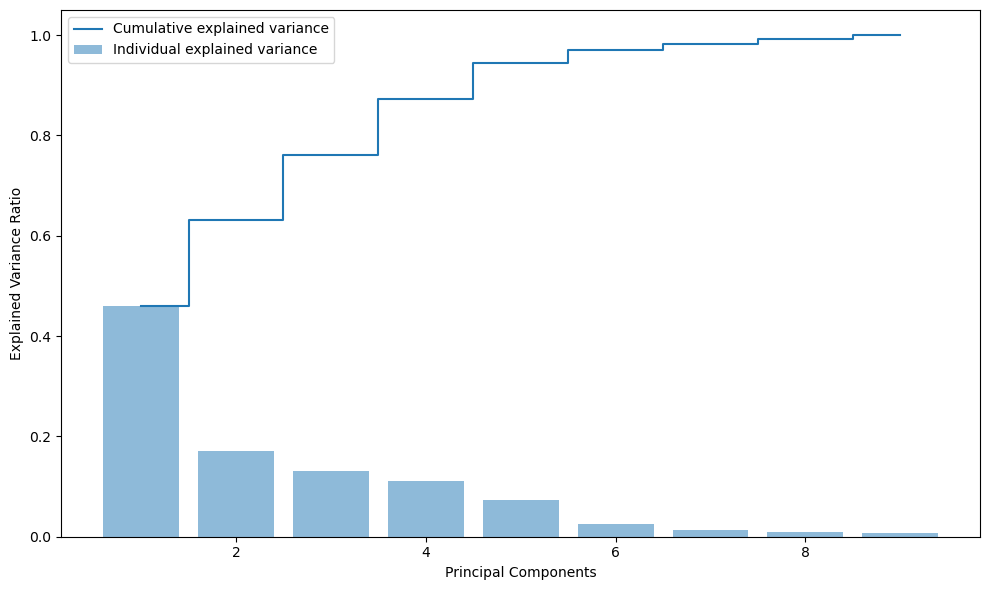

(array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
        0.02484235, 0.0126043 , 0.00981282, 0.00743056]),
 array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
        0.97015232, 0.98275663, 0.99256944, 1.        ]))

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

features = df.columns[1:]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

pca = PCA()
pca_data = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

explained_variance, np.cumsum(explained_variance)


In [12]:
pca = PCA(n_components=4)
pca_data_transformed = pca.fit_transform(scaled_data)


df_pca = pd.DataFrame(data = pca_data_transformed, columns = ['Principal Component 1',
                                                              'Principal Component 2',
                                                              'Principal Component 3',
                                                              'Principal Component 4'])

df_pca.head()


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [13]:
import numpy as np

np.__version__

'1.24.3'

In [14]:
df_pca.describe()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,7.445807e-17,-8.775416e-17,-1.994413e-17
std,2.039748e+00,1.247262e+00,1.085096e+00,1.000389e+00
min,-4.912066e+00,-2.997364e+00,-2.714085e+00,-1.595199e+00
25%,-1.382270e+00,-7.520480e-01,-5.218776e-01,-7.837847e-01
50%,2.240726e-02,-9.449868e-02,-2.456059e-01,-3.118565e-01
75%,1.224328e+00,5.534747e-01,4.025451e-01,7.107253e-01
max,6.917755e+00,6.682090e+00,6.110158e+00,3.129643e+00


C:\Users\mitsu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mitsu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mitsu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mitsu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

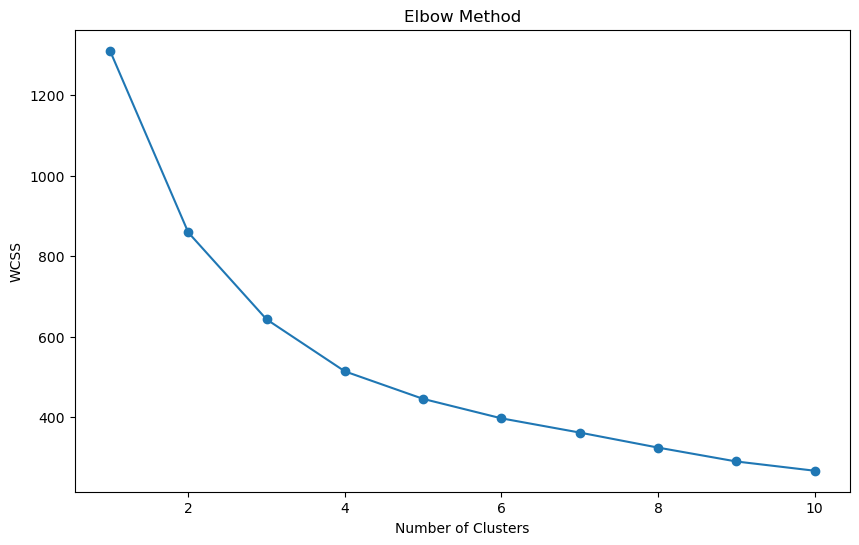

In [15]:
from sklearn.cluster import KMeans

# Step 1: Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
# Step 2: K-Means Fitting
kmeans = KMeans(n_clusters=3,  random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(df_pca)

# Step 3: Cluster Analysis
df['Cluster_KMeans'] = kmeans_clusters

df.head()


C:\Users\mitsu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [17]:
df["Cluster_KMeans"].value_counts()

2    84
1    48
0    35
Name: Cluster_KMeans, dtype: int64

In [18]:
df.query("Cluster_KMeans == 2")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMeans
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,2
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,2
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2


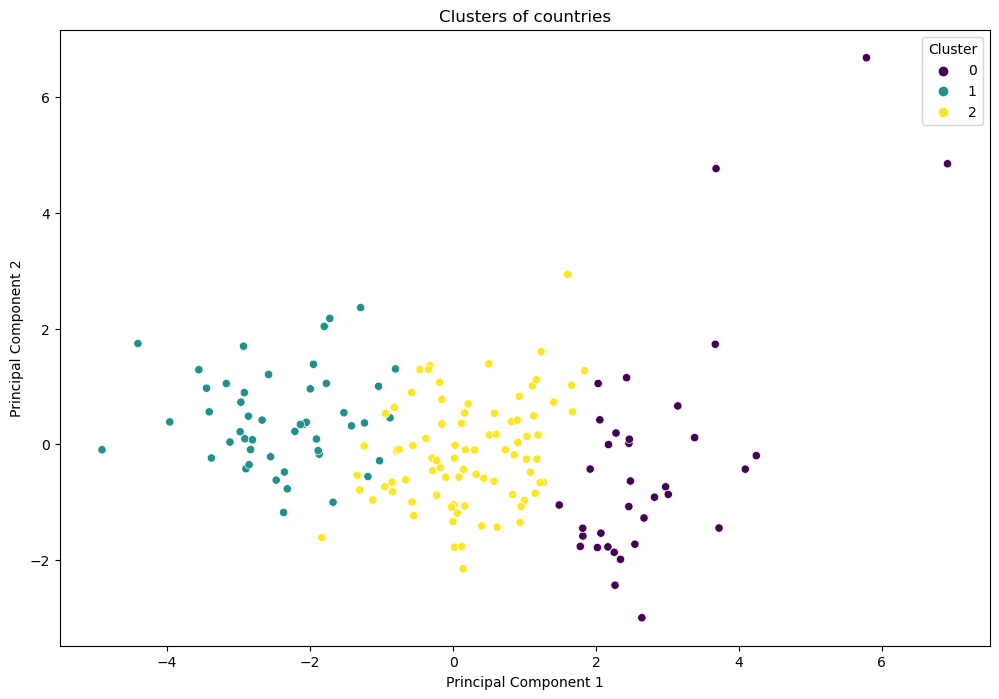

In [20]:
# Visual Representation using scatter plots

df_pca['Cluster_KMeans'] = kmeans_clusters

import seaborn as sns

# Visualizing the clusters using seaborn's scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster_KMeans', palette='viridis', data=df_pca)
plt.title('Clusters of countries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()




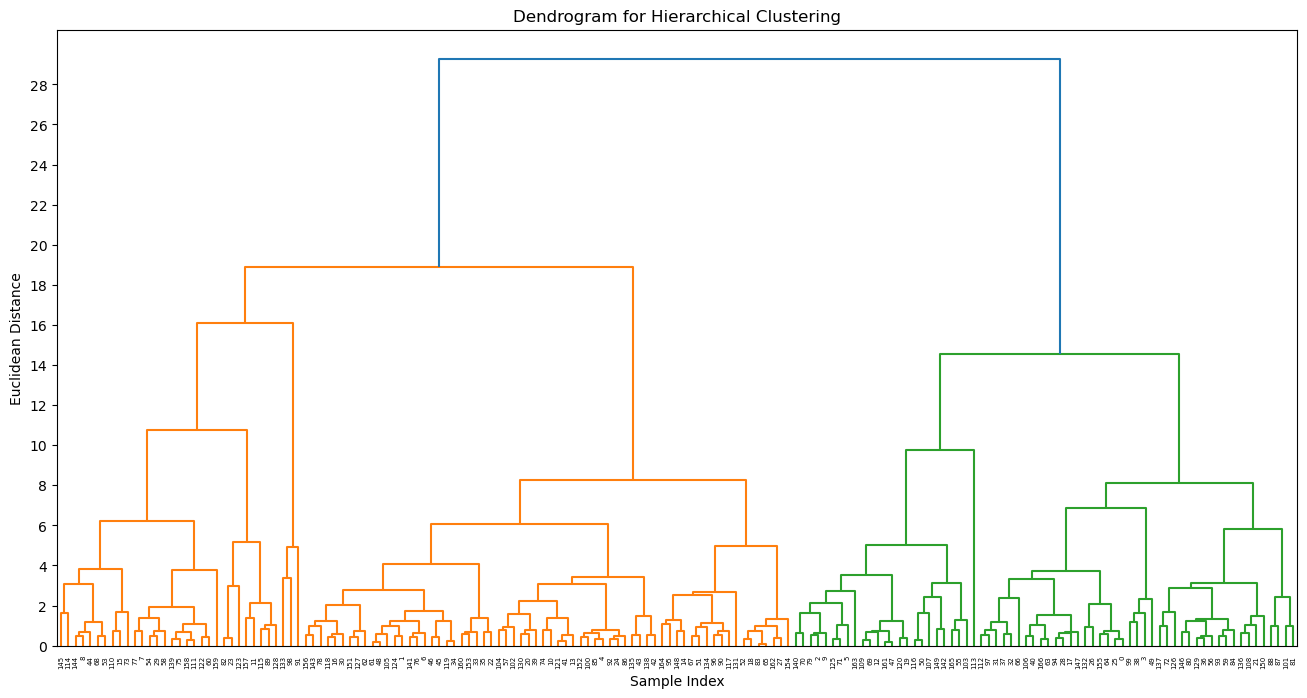

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Create the Dendrogram
linked = linkage(df_pca.drop('Cluster_KMeans', axis=1), method='ward')

# Plotting the dendrogram
plt.figure(figsize=(16, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.yticks(list(np.arange(0, 30, 2)))
plt.show()


In [22]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_clusters = agg_clustering.fit_predict(df_pca.drop('Cluster_KMeans', axis=1))


df['Cluster_Hierarchical'] = agg_clusters


In [23]:
cols_needed = df.select_dtypes(exclude="object").columns[:9]
df.groupby('Cluster_Hierarchical')[cols_needed].mean().T

Cluster_Hierarchical,0,1,2
child_mort,6.003030,74.598529,16.974242
exports,59.221212,28.876456,44.656061
health,8.527576,6.054706,6.743788
imports,49.387879,39.461263,53.295455
income,48133.333333,5582.250000,13563.181818
inflation,4.186576,13.080809,4.119909
life_expec,79.939394,62.492647,74.171212
total_fer,1.853939,4.284265,2.118182
gdpp,43551.515152,2588.058824,8361.000000
